In [1]:
import pandas as pd
import scipy.stats as sps
from fitter import Fitter, get_common_distributions, get_distributions
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import f_classif, chi2, SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import accuracy_score # for classification problem
from sklearn.metrics import mean_absolute_error # for regression problem
from sklearn.model_selection import cross_val_score, RepeatedKFold, RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
import numpy as np
from numpy import mean, std, absolute

In [3]:
df = pd.read_csv('/Users/jennyhuang/Documents/jobs/DBC-AI-Launch/project2-MDdataCleaning/data-explore/combine_v2_final.csv')
# df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop('provider-name__lnk', axis=1, inplace=True)
df

,Unnamed: 0,location-info__office-loc 2,sr-only,location-info__distance,review_number,provider_detail,feats,feats1,feats2
0,0,0,-1.0,20-30,>400,17.0,0.0,0.0,1.0
1,1,1,-1.0,40-60,>400,29.0,0.0,0.0,1.0
2,2,2,-1.0,40-60,>400,17.0,0.0,0.0,1.0
3,3,2,4-5,60-80,0-25,26.0,3.0,4.0,0.0
4,4,2,4-5,40-60,0-25,17.0,5.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...
816,816,2,-1.0,40-60,>400,17.0,0.0,0.0,1.0
817,817,3,-1.0,20-30,>400,17.0,0.0,0.0,1.0
818,818,0,-1.0,20-30,>400,17.0,0.0,0.0,1.0
819,819,2,-1.0,40-60,>400,17.0,0.0,0.0,1.0


In [4]:
data = df.drop('Unnamed: 0', axis=1)
cormat = data.corr(method='pearson')
# cormat.style.background_gradient(cmap='coolwarm').set_precision(2)
cormat.style.background_gradient(cmap='coolwarm').format(precision=2)

,location-info__office-loc 2,provider_detail,feats,feats1,feats2
location-info__office-loc 2,1.00,-0.06,0.05,0.07,-0.03
provider_detail,-0.06,1.00,-0.05,-0.11,0.05
feats,0.05,-0.05,1.00,0.39,0.56
feats1,0.07,-0.11,0.39,1.00,-0.20
feats2,-0.03,0.05,0.56,-0.20,1.00


In [5]:
col_list = list(df)
col_list[1], col_list[2] = col_list[2], col_list[1]
# df.columns = col_list
df = df.loc[:, col_list]
df

,Unnamed: 0,sr-only,location-info__office-loc 2,location-info__distance,review_number,provider_detail,feats,feats1,feats2
0,0,-1.0,0,20-30,>400,17.0,0.0,0.0,1.0
1,1,-1.0,1,40-60,>400,29.0,0.0,0.0,1.0
2,2,-1.0,2,40-60,>400,17.0,0.0,0.0,1.0
3,3,4-5,2,60-80,0-25,26.0,3.0,4.0,0.0
4,4,4-5,2,40-60,0-25,17.0,5.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...
816,816,-1.0,2,40-60,>400,17.0,0.0,0.0,1.0
817,817,-1.0,3,20-30,>400,17.0,0.0,0.0,1.0
818,818,-1.0,0,20-30,>400,17.0,0.0,0.0,1.0
819,819,-1.0,2,40-60,>400,17.0,0.0,0.0,1.0


In [6]:
dataset = df.values
dataset

array([[0, '-1.0', 0, ..., 0.0, 0.0, 1.0],
       [1, '-1.0', 1, ..., 0.0, 0.0, 1.0],
       [2, '-1.0', 2, ..., 0.0, 0.0, 1.0],
       ...,
       [818, '-1.0', 0, ..., 0.0, 0.0, 1.0],
       [819, '-1.0', 2, ..., 0.0, 0.0, 1.0],
       [820, '-1.0', 3, ..., 0.0, 0.0, 1.0]], dtype=object)

In [7]:
X_reg = dataset[:, [2, 3, 5, 6, 7, 8]]
y_reg = dataset[:, [1, 4]]

In [8]:
X_class_1 = dataset[:, [1, 2, 3, 5, 6, 7, 8]]
y_class_1 = dataset[:, 4] # review number
X_class_2 = dataset[:, [2, 3, 4, 5, 6, 7, 8]]
y_class_2 = dataset[:, 1] # sr-only

In [9]:
X_reg = X_reg.astype(str)
X_class_1 = X_class_1.astype(str)
X_class_2 = X_class_2.astype(str)

# classification method

In [10]:
X_train_class1, X_test_class1, y_train_class1, y_test_class1 = train_test_split(X_class_1, y_class_1, test_size=0.3, random_state=1) # 0.3 testing 0.7 for training
X_train_class2, X_test_class2, y_train_class2, y_test_class2 = train_test_split(X_class_2, y_class_2, test_size=0.3, random_state=1)

In [11]:
# summarize
for i in range(2):
    print('Train', vars()['X_train_class'+str(i+1)].shape, vars()['y_train_class'+str(i+1)].shape)
    print('Test', vars()['X_test_class'+str(i+1)].shape, vars()['y_test_class'+str(i+1)].shape)

Train (574, 7) (574,)
Test (247, 7) (247,)
Train (574, 7) (574,)
Test (247, 7) (247,)


In [12]:
# prepare input data use OrdinalEncoder
# OrdinalEncoder() from scikit-learn to encode each variable to integers
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

In [13]:
for i in range(2):
    vars()['X_train_enc'+str(i + 1)], vars()['X_test_enc'+str(i + 1)] = prepare_inputs(vars()['X_train_class'+str(i + 1)], vars()['X_test_class' + str(i + 1)]) 
    vars()['y_train_enc'+str(i + 1)], vars()['y_test_enc'+str(i + 1)] = prepare_targets(vars()['y_train_class'+str(i + 1)], vars()['y_test_class' + str(i + 1)]) 

In [14]:
X_train_enc1.shape

(574, 7)

In [15]:
# X_train_enc1

In [16]:
y_train_enc1.shape

(574,)

In [17]:
# y_train_enc1

In [18]:
# np.concatenate((X_train_enc1, y_train_enc1))

In [19]:
y_train_enc2.shape

(574,)

In [20]:
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train) # Reduce X to the selected features.
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [21]:
feature_name = {}
names = df.columns
for i in range(1, len(names)):
    feature_name[i - 1] = names[i]
feature_name

{0: 'sr-only',
 1: 'location-info__office-loc 2',
 2: 'location-info__distance',
 3: 'review_number',
 4: 'provider_detail',
 5: 'feats',
 6: 'feats1',
 7: 'feats2'}

Feature 0: 625.852570
Feature 1: 12.324935
Feature 2: 3.180955
Feature 3: 24.735959
Feature 4: 498.913304
Feature 5: 228.975801
Feature 6: 42.784671


Text(0, 0.5, 'Score')

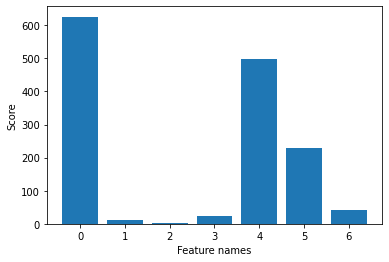

In [23]:
# feature selection for y_train_enc1 (review_number)
X_train_fs1, X_test_fs1, fs1 = select_features(X_train_enc1, y_train_enc1, X_test_enc1)
# what are scores for the features
for i in range(len(fs1.scores_)):
    print('Feature %d: %f' % (i, fs1.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs1.scores_))], fs1.scores_)
plt.xlabel('Feature names')
plt.ylabel('Score')
# plt.savefig('/Users/jennyhuang/Documents/jobs/DBC-AI-Launch/project2-MDdataCleaning/model/feature1.png', bbox_inches='tight')
# result shows that the sr-only effects review_number mostly, then feats 2 then location info2

Feature 0: 2.913846
Feature 1: 6.393883
Feature 2: 1591.542362
Feature 3: 14.129575
Feature 4: 627.717541
Feature 5: 297.250537
Feature 6: 57.582337


Text(0, 0.5, 'Score')

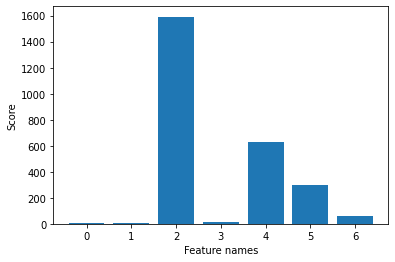

In [24]:
# feature selection for y_train_enc2 (sr-only)
X_train_fs2, X_test_fs2, fs2 = select_features(X_train_enc2, y_train_enc2, X_test_enc2)
# what are scores for the features
for i in range(len(fs2.scores_)):
    print('Feature %d: %f' % (i, fs2.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs2.scores_))], fs2.scores_)
plt.xlabel('Feature names')
plt.ylabel('Score')
# plt.savefig('/Users/jennyhuang/Documents/jobs/DBC-AI-Launch/project2-MDdataCleaning/model/feature2.png', bbox_inches='tight')
# plt.show()
# the result shows the review_number effects sr-only the most, then location info 2 then feats 2

## decision tree classification model

In [29]:
# fit the model for review_number
model = DecisionTreeClassifier()
model.fit(X_train_fs1, y_train_enc1)
# evaluate the model
yhat = model.predict(X_test_fs1)
# evaluate predictions
accuracy = accuracy_score(y_test_enc1, yhat)
print('Accuracy: %.2f' % (accuracy*100) + '%') # 79.38%
error = mean_absolute_error(y_test_enc1, yhat)
print('MAE: %.3f' % (error))

Accuracy: 76.11%
MAE: 1.105


In [30]:
# fit the model for sr-only
model = DecisionTreeClassifier()
model.fit(X_train_fs2, y_train_enc2)
# evaluate the model
yhat = model.predict(X_test_fs2)
# evaluate predictions
accuracy = accuracy_score(y_test_enc2, yhat)
print('Accuracy: %.2f' % (accuracy*100) + '%') # 83.21%
error = mean_absolute_error(y_test_enc2, yhat)
print('MAE: %.3f' % (error))

Accuracy: 88.66%
MAE: 0.166


## try rfe with DecisionTreeClassifier

In [62]:
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=3)
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=3, random_state=1) # If your target variable is continuous then use simple KFold cross validation instead of StratifiedKFold.
n_scores = cross_val_score(pipeline, X_train_enc1, y_train_enc1, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print("Accuracy: %.3f (%.3f)" % (mean(n_scores), std(n_scores)))

/Users/jennyhuang/yes/lib/python3.9/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/Users/jennyhuang/yes/lib/python3.9/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/Users/jennyhuang/yes/lib/python3.9/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


Accuracy: 0.783 (0.011)


In [63]:
rfe.fit(X_train_enc1, y_train_enc1)
# summarize all features
for i in range(X_train_enc1.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected True, Rank: 1.000
Column: 1, Selected False, Rank: 2.000
Column: 2, Selected True, Rank: 1.000
Column: 3, Selected True, Rank: 1.000
Column: 4, Selected False, Rank: 5.000
Column: 5, Selected False, Rank: 3.000
Column: 6, Selected False, Rank: 4.000


In [64]:
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=3)
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=3, random_state=1) # If your target variable is continuous then use simple KFold cross validation instead of StratifiedKFold.
n_scores = cross_val_score(pipeline, X_train_enc2, y_train_enc2, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print("Accuracy: %.3f (%.3f)" % (mean(n_scores), std(n_scores)))

Accuracy: 0.911 (0.028)


In [65]:
rfe.fit(X_train_enc2, y_train_enc2)
# summarize all features
for i in range(X_train_enc1.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected False, Rank: 2.000
Column: 1, Selected False, Rank: 4.000
Column: 2, Selected True, Rank: 1.000
Column: 3, Selected False, Rank: 5.000
Column: 4, Selected False, Rank: 3.000
Column: 5, Selected True, Rank: 1.000
Column: 6, Selected True, Rank: 1.000


In [66]:
feature_name

{0: 'sr-only',
 1: 'location-info__office-loc 2',
 2: 'location-info__distance',
 3: 'review_number',
 4: 'provider_detail',
 5: 'feats',
 6: 'feats1',
 7: 'feats2'}

In [67]:
X_train_enc1.shape

(574, 7)

# regression method

In [68]:
names

Index(['Unnamed: 0', 'sr-only', 'location-info__office-loc 2',
       'location-info__distance', 'review_number', 'provider_detail', 'feats',
       'feats1', 'feats2'],
      dtype='object')

In [69]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=1) # 0.3 testing 0.7 for training

In [70]:
X_train_enc, X_test_enc = prepare_inputs(X_train_reg, X_test_reg)
y_train_enc = np.append([y_train_enc1], [y_train_enc2], axis=0)

In [71]:
y_train_enc = y_train_enc.transpose()

## without feature selection(RFE)

In [72]:
model = DecisionTreeRegressor()
# evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1) # If your target variable is continuous then use simple KFold cross validation instead of StratifiedKFold.
n_scores = cross_val_score(model, X_train_enc, y_train_enc, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
n_scores = absolute(n_scores)
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: 1.138 (0.133)


## with feature selection(RFE)

In [73]:
rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=3)
model = DecisionTreeRegressor()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X_train_enc, y_train_enc, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
n_scores = absolute(n_scores)
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: 1.304 (0.168)


In [74]:
# see the feature selection result
rfe.fit(X_train_enc, y_train_enc)
for i in range(X_train_enc.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected True, Rank: 1.000
Column: 1, Selected False, Rank: 2.000
Column: 2, Selected True, Rank: 1.000
Column: 3, Selected True, Rank: 1.000
Column: 4, Selected False, Rank: 3.000
Column: 5, Selected False, Rank: 4.000


In [75]:
rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=1)
model = DecisionTreeRegressor()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X_train_enc, y_train_enc, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
n_scores = absolute(n_scores)
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: 1.297 (0.142)


In [76]:
# see the feature selection result
rfe.fit(X_train_enc, y_train_enc)
for i in range(X_train_enc.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected False, Rank: 3.000
Column: 1, Selected False, Rank: 4.000
Column: 2, Selected False, Rank: 2.000
Column: 3, Selected True, Rank: 1.000
Column: 4, Selected False, Rank: 5.000
Column: 5, Selected False, Rank: 6.000


In [77]:
rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=2)
model = DecisionTreeRegressor()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X_train_enc, y_train_enc, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
n_scores = absolute(n_scores)
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: 1.280 (0.154)


In [78]:
# see the feature selection result
rfe.fit(X_train_enc, y_train_enc)
for i in range(X_train_enc.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected False, Rank: 2.000
Column: 1, Selected False, Rank: 3.000
Column: 2, Selected True, Rank: 1.000
Column: 3, Selected True, Rank: 1.000
Column: 4, Selected False, Rank: 4.000
Column: 5, Selected False, Rank: 5.000
